In [1]:
import numpy as np
from mlp import Mlp
import cv2
import matplotlib.pyplot as plt
from onehotEncoder import OneHotEncoding
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

In [2]:
dataset = load_digits()

X= dataset.data
Y=dataset.target

one_hot=OneHotEncoding()
Y=np.array(Y)
Y=one_hot.encode(Y)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

In [3]:
epochs =90
η = 0.001   #learning rate

D_in=X_train.shape[1]   # D_in = 64
H1 = 128
H2 = 32
D_out = len(dataset.target_names)
func1="sigmoid"
func2="softmax"

In [4]:
mlp=Mlp(D_in,H1,H2,D_out,epochs,η,func1,func1,func2)

losses,accuracies=mlp.fit(X_train,Y_train)

loss_train,accuracy_train = mlp.evaluate( X_train,Y_train)
loss_test,accuracy_test = mlp.evaluate( X_test, Y_test)

print(f"loss_test: {loss_test}       accuracy_test: {accuracy_test}")
print(f"loss_train: {loss_train}       accuracy_train: {accuracy_train}")

100%|██████████| 90/90 [00:20<00:00,  4.39it/s]

loss_test: 0.01502936039603393       accuracy_test: 0.9083333333333333
loss_train: 0.003101424086044096       accuracy_train: 0.9874739039665971


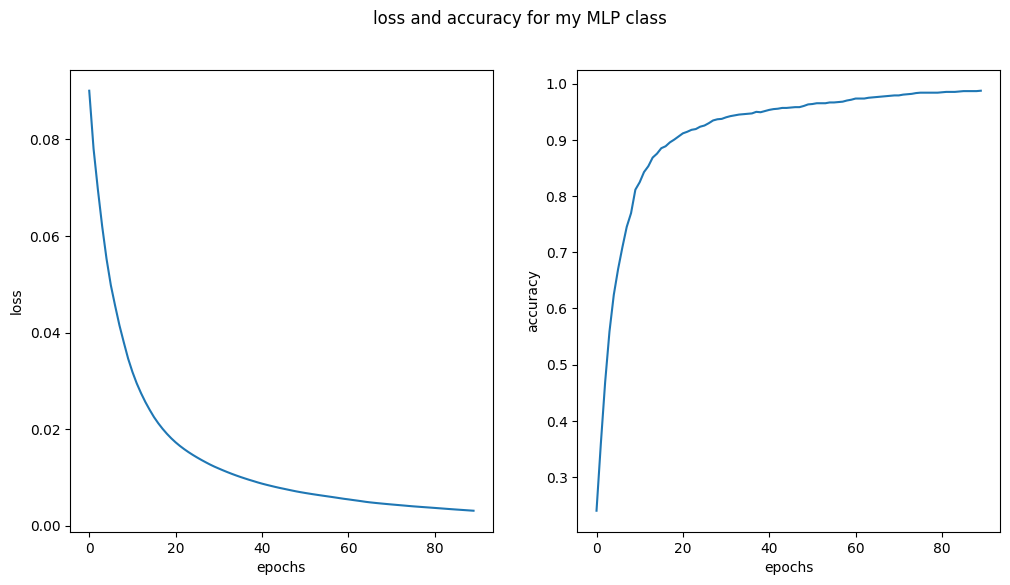

In [33]:
plt.figure(figsize=(12,6))
plt.suptitle("loss and accuracy for my MLP class")
plt.subplot(1,2,1)
plt.plot(losses)
plt.ylabel("loss")
plt.xlabel("epochs")
plt.subplot(1,2,2)
plt.plot(accuracies)
plt.ylabel("accuracy")
plt.xlabel("epochs")
plt.show()

True number is: 0       MLP predicted number: 0
True number is: 1       MLP predicted number: 1
True number is: 2       MLP predicted number: 2
True number is: 3       MLP predicted number: 3
True number is: 4       MLP predicted number: 4
True number is: 5       MLP predicted number: 5
True number is: 6       MLP predicted number: 6
True number is: 7       MLP predicted number: 7
True number is: 8       MLP predicted number: 8
True number is: 9       MLP predicted number: 9


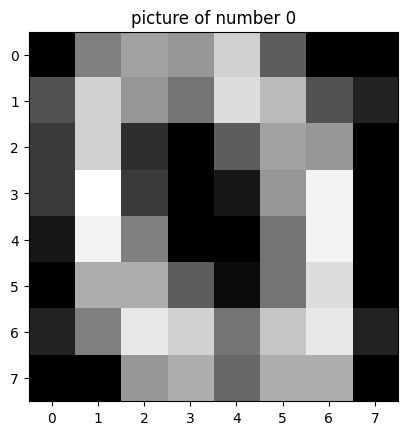

In [30]:


for i in range(10):
    image = cv2.imread(f"input/{i}.jpg")
    image = cv2.cvtColor(image , cv2.COLOR_BGR2GRAY)

    if i==0:
        image1=image

    image = image.reshape(1,64)

    x= image
    y_pred=mlp.predict(x)
    # print(f"result: {y_pred}")
    print(f"True number is: {i}       MLP predicted number: {one_hot.decode(y_pred)}")


plt.imshow(image1,cmap='gray')
plt.title("picture of number 0")
plt.show()